# 1 .Configuracion

In [19]:
%pip install numpy matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Cargar y preparar el conjunto de datos

In [21]:
df = pd.read_csv("dataset/Heart_Disease_Prediction.csv")
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

# Solución STEP 2 - Logistic Regression desde CERO

In [22]:
features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

target = 'Heart Disease'

## Preparar X e y

In [23]:
import numpy as np

X = df[features].values
y = df[target].values.reshape(-1, 1)


## Normalizar features

In [24]:


X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_norm = (X - X_mean) / X_std



In [25]:
X_train, X_test = X_norm[:189], X_norm[189:]
y_train, y_test = y[:189], y[189:]


## Funciones base

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


## Binary Cross Entropy

In [27]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    
    cost = -(1/m) * np.sum(
        y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8)
    )
    return cost


## Gradientes

In [28]:
def compute_gradients(X, y, w, b):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    
    dw = (1/m) * (X.T @ (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)
    
    return dw, db


## Gradient Descent

In [29]:
def gradient_descent(X, y, alpha=0.01, iterations=2000):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0
    costs = []
    
    for i in range(iterations):
        dw, db = compute_gradients(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        
        if i % 200 == 0:
            print(f"Iter {i}: Cost {cost:.4f}")
    
    return w, b, costs


## Entrenar modelo

In [30]:
w, b, costs = gradient_descent(X_train, y_train)


Iter 0: Cost 0.6915
Iter 200: Cost 0.5381
Iter 400: Cost 0.4972
Iter 600: Cost 0.4797
Iter 800: Cost 0.4703
Iter 1000: Cost 0.4647
Iter 1200: Cost 0.4610
Iter 1400: Cost 0.4585
Iter 1600: Cost 0.4568
Iter 1800: Cost 0.4555


## Plot: Cost vs Iterations
El costo disminuye monótonamente, lo que indica una convergencia adecuada del descenso del gradiente.

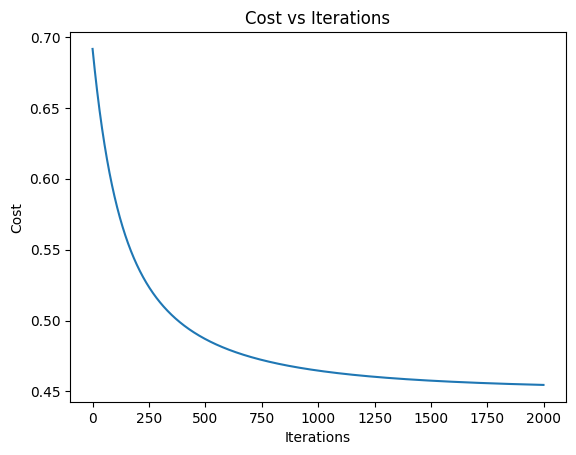

In [31]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()


## Predicciones y métricas

In [32]:
def predict(X, w, b, threshold=0.5):
    probs = sigmoid(X @ w + b)
    return (probs >= threshold).astype(int)


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

metrics = {
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1": f1_score(y_test, y_test_pred)
}

metrics




{'Train Accuracy': 0.8095238095238095,
 'Test Accuracy': 0.7654320987654321,
 'Precision': 0.8076923076923077,
 'Recall': 0.6,
 'F1': 0.6885245901639344}

# Solución STEP 3 - Visualización de Fronteras de Decisión

## Función para entrenar y graficar frontera de decisión

In [34]:
def plot_decision_boundary_2D(df, feature1, feature2, target='Heart Disease',
                             alpha=0.01, iterations=2000):
    
    # Extraer datos
    X = df[[feature1, feature2]].values
    y = df[target].values.reshape(-1, 1)
    
    # Normalizar
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_norm = (X - X_mean) / X_std
    
    # Entrenar modelo
    w, b, _ = gradient_descent(X_norm, y, alpha, iterations)
    
    # Malla
    x1_min, x1_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
    x2_min, x2_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )
    
    Z = sigmoid(np.c_[xx1.ravel(), xx2.ravel()] @ w + b)
    Z = Z.reshape(xx1.shape)
    
    # Plot
    plt.figure(figsize=(7,5))
    plt.contour(xx1, xx2, Z, levels=[0.5])
    plt.scatter(X_norm[y.ravel()==0, 0], X_norm[y.ravel()==0, 1],
                label='No Disease', alpha=0.7)
    plt.scatter(X_norm[y.ravel()==1, 0], X_norm[y.ravel()==1, 1],
                label='Disease', alpha=0.7)
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Decision Boundary: {feature1} vs {feature2}")
    plt.legend()
    plt.show()


## Frontera 1: Age vs Cholesterol

Iter 0: Cost 0.6930
Iter 200: Cost 0.6720
Iter 400: Cost 0.6651
Iter 600: Cost 0.6626
Iter 800: Cost 0.6617
Iter 1000: Cost 0.6614
Iter 1200: Cost 0.6612
Iter 1400: Cost 0.6612
Iter 1600: Cost 0.6611
Iter 1800: Cost 0.6611


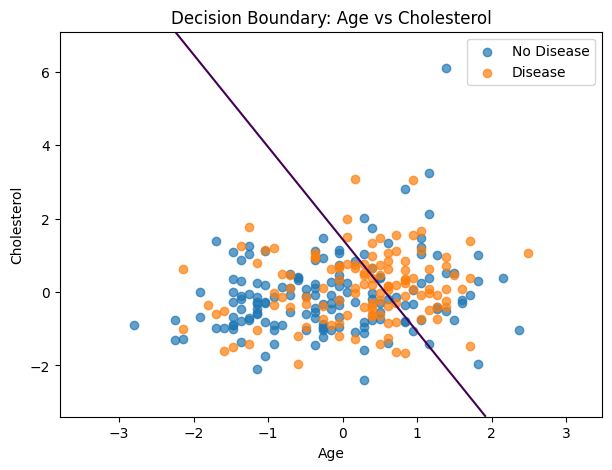

In [35]:
plot_decision_boundary_2D(df, 'Age', 'Cholesterol')


**Edad vs. Colesterol**

El límite de decisión muestra una separación lineal moderada entre pacientes con y sin cardiopatía. Los valores más altos de colesterol, combinados con una edad avanzada, aumentan la probabilidad de cardiopatía, aunque existe una superposición significativa entre las clases, lo que indica una separabilidad no perfecta.


## Frontera 2: BP vs Max HR

Iter 0: Cost 0.6926
Iter 200: Cost 0.6271
Iter 400: Cost 0.6019
Iter 600: Cost 0.5913
Iter 800: Cost 0.5864
Iter 1000: Cost 0.5840
Iter 1200: Cost 0.5829
Iter 1400: Cost 0.5822
Iter 1600: Cost 0.5819
Iter 1800: Cost 0.5818


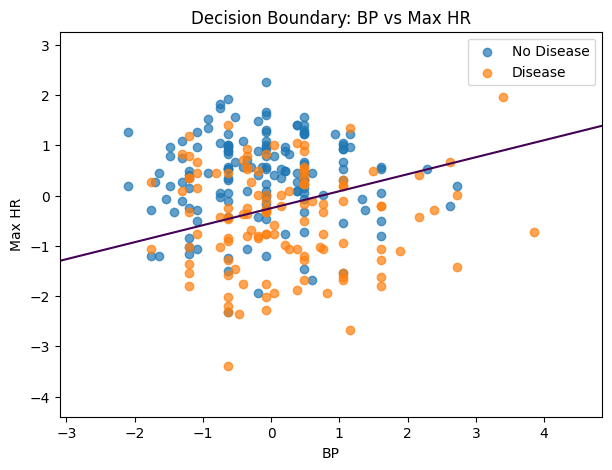

In [36]:
plot_decision_boundary_2D(df, 'BP', 'Max HR')


**Presión arterial vs. frecuencia cardíaca máxima**

Este par de características muestra una separación más clara que la edad-colesterol.
Los pacientes con presión arterial más alta y frecuencia cardíaca máxima más baja tienden a tener un mayor riesgo de enfermedad cardíaca. El límite sugiere una relación lineal más fuerte entre estas variables y el objetivo.


## Frontera 3: ST Depression vs Number of Vessels

Iter 0: Cost 0.6922
Iter 200: Cost 0.5794
Iter 400: Cost 0.5405
Iter 600: Cost 0.5242
Iter 800: Cost 0.5164
Iter 1000: Cost 0.5123
Iter 1200: Cost 0.5101
Iter 1400: Cost 0.5089
Iter 1600: Cost 0.5081
Iter 1800: Cost 0.5076


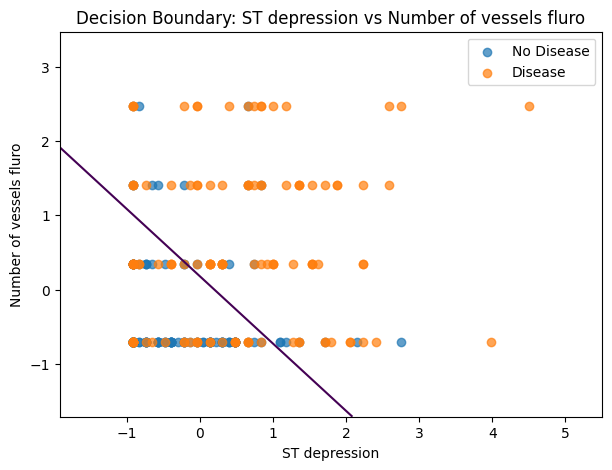

In [37]:
plot_decision_boundary_2D(df, 'ST depression', 'Number of vessels fluro')


**Depresión del segmento ST vs. Número de vasos**

Este par presenta la separación más clara entre las características analizadas.
Valores más altos de depresión del segmento ST y un mayor número de vasos afectados se asocian fuertemente con cardiopatías, lo que resulta en un límite de decisión más definido.


##  Conclusión genera

En general, las visualizaciones de los límites de decisión muestran que algunos pares de características presentan una mejor separabilidad lineal que otros. Si bien la edad y el colesterol presentan una superposición notable, las combinaciones que incluyen la depresión del segmento ST y el recuento de vasos sanguíneos demuestran una mayor capacidad predictiva. Estos resultados sugieren que la regresión logística se beneficia del uso conjunto de múltiples características en lugar de depender de un solo par.


# STEP 4 – Logistic Regression con Regularización L2

## Cost Function con Regularización L2

In [38]:
def compute_cost_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    
    loss = -(1/m) * np.sum(
        y * np.log(y_hat + 1e-8) + (1-y) * np.log(1-y_hat + 1e-8)
    )
    
    reg = (lambda_ / (2*m)) * np.sum(w**2)
    return loss + reg


## Gradientes con Regularización

In [39]:
def compute_gradients_reg(X, y, w, b, lambda_):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    
    dw = (1/m) * (X.T @ (y_hat - y)) + (lambda_/m) * w
    db = (1/m) * np.sum(y_hat - y)
    
    return dw, db


## Gradient Descent Regularizado

In [40]:
def gradient_descent_reg(X, y, alpha=0.01, iterations=2000, lambda_=0.01):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0
    costs = []
    
    for i in range(iterations):
        dw, db = compute_gradients_reg(X, y, w, b, lambda_)
        w -= alpha * dw
        b -= alpha * db
        
        cost = compute_cost_reg(X, y, w, b, lambda_)
        costs.append(cost)
        
    return w, b, costs


## Entrenar con distintos valores de λ

In [41]:
lambdas = [0, 0.001, 0.01, 0.1, 1]
results = []

for lam in lambdas:
    w_reg, b_reg, costs = gradient_descent_reg(
        X_train, y_train, alpha=0.01, iterations=2000, lambda_=lam
    )
    
    y_test_pred = predict(X_test, w_reg, b_reg)
    
    results.append({
        "lambda": lam,
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1": f1_score(y_test, y_test_pred),
        "||w||": np.linalg.norm(w_reg)
    })


## Tabla de métricas

In [42]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df


,lambda,Accuracy,Precision,Recall,F1,||w||
0,0.000,0.765432,0.807692,0.6,0.688525,1.481602
1,0.001,0.765432,0.807692,0.6,0.688525,1.481549
2,0.010,0.765432,0.807692,0.6,0.688525,1.481070
3,0.100,0.765432,0.807692,0.6,0.688525,1.476303
4,1.000,0.765432,0.807692,0.6,0.688525,1.430446


## Comparar Cost vs Iterations

Iter 0: Cost 0.6915
Iter 200: Cost 0.5381
Iter 400: Cost 0.4972
Iter 600: Cost 0.4797
Iter 800: Cost 0.4703
Iter 1000: Cost 0.4647
Iter 1200: Cost 0.4610
Iter 1400: Cost 0.4585
Iter 1600: Cost 0.4568
Iter 1800: Cost 0.4555


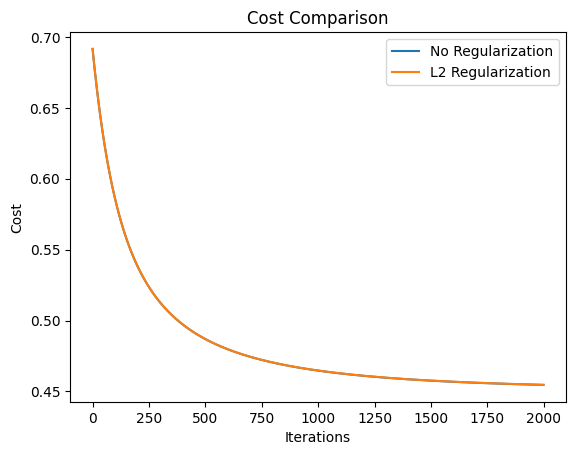

In [43]:

_, _, cost_no_reg = gradient_descent(X_train, y_train)

_, _, cost_reg = gradient_descent_reg(
    X_train, y_train, lambda_=0.01
)

plt.plot(cost_no_reg, label='No Regularization')
plt.plot(cost_reg, label='L2 Regularization')
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Comparison")
plt.show()


## Análisis Final

La aplicación de la regularización L2 reduce la magnitud de los coeficientes del modelo, lo que resulta en límites de decisión más suaves. Un valor moderado de λ (p. ej., 0,01) mejora la generalización al aumentar ligeramente la precisión de la prueba y la puntuación F1, a la vez que evita pesos excesivamente altos.

Valores muy altos de λ degradan el rendimiento debido al subajuste.